# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 04. Neural Networks - Multi-Class Classification
### Dataset: IMDB

### The Steps
* **Step01**. Loading Dataset
* **Step02**. Assesing the Dataset
* **Step03**. Preparing the Dataset
* **Step04**. Building the network architecture
* **Step05**. The compilation
* **Step06**. Creating a Validation Set
* **Step07**. Training
* **Step08**. Evaluating the performance

### Step 01. Loading Dataset

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


**num_words** is to keep the 10000 most frequent samples to overlook rare samples so that the vector would be manageble

### Step 02. Assesing the Dataset

In [5]:
print("Training data dimensions:", train_data.shape)
print("Number of training labels:", len(train_labels))
print("Test data dimensions:", test_data.shape)
print("Number of test labels:", len(test_labels))

Training data dimensions: (8982,)
Number of training labels: 8982
Test data dimensions: (2246,)
Number of test labels: 2246


In [21]:
## Number of labels
import numpy as np
len(np.unique(train_labels))

46

In [7]:
reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

### Step03. Preparing the Dataset

**Decoding newswires back to text**  

In [10]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])

Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

**Encoding the data**

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

**Vectorizing the training and test data**

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Vectorizing the labels**  
To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding.  
One-hot encoding is a widely used format for categorical data, also called categorical encoding.  
In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

**Note that there is a built-in way to do this in Keras**

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Step04. Building the network architecture

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

1. You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector.  
Each entry in this vector (each dimension) will encode a different output class.


2. The last layer uses a softmax activation.  
It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46- dimensional output vector, where output[i] is the probability that the sample belongs to class i.  
The 46 scores will sum to 1.

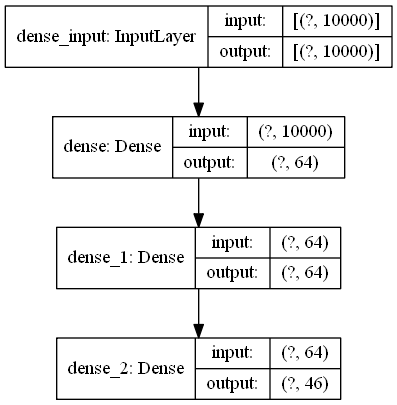

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_ch04.png', show_shapes=True, show_layer_names=True)

### Step05. The compilation

The best **loss function** to use in this case is **categorical_crossentropy**.

It measures the distance between two probability distributions:  
here, between the probability distribution output by the network and the true distribution of the labels.  

By minimizing the distance between these two distributions, you train the network to output something as close as possible to the true labels.

In [25]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

### Step06. Creating a Validation Set

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Step07. Training

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

In [33]:
hist1 = history.history
hist1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
hist1['accuracy'][19]

0.958406388759613

### Step08. Evaluating the performance

#### Plotting the training and validation loss

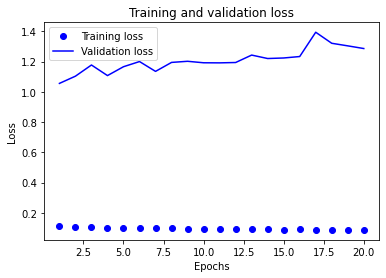

In [45]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

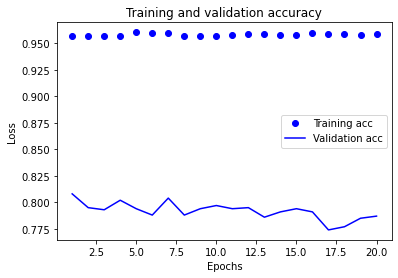

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set.

#### Retraining a model from scratch

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
#
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 25ms/step - loss: 2.5420 - accuracy: 0.5194 - val_loss: 1.6695 - val_accuracy: 0.6280
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.3849 - accuracy: 0.6991 - val_loss: 1.3036 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0523 - accuracy: 0.7681 - val_loss: 1.1374 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8293 - accuracy: 0.8227 - val_loss: 1.0343 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6649 - accuracy: 0.8594 - val_loss: 0.9537 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5269 - accuracy: 0.8903 - val_loss: 0.9556 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4216 - accuracy: 0.9112 - val_loss: 0.9062 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

#### Random baseline  

This approach reaches an accuracy of ~80%.  
With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%.

But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:

In [47]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19590382902938558

#### Predictions

In [50]:
predictions = model.predict(x_test)
print("Each entry in predictions is a vector of length 46:",predictions[0].shape)
print("The coefficients in this vector sum to 1:",np.sum(predictions[0]))
print("The largest entry is the predicted class—the class with the highest probability:",np.argmax(predictions[0]))

Each entry in predictions is a vector of length 46: (46,)
The coefficients in this vector sum to 1: 1.0000001
The largest entry is the predicted class—the class with the highest probability: 3


### Further Iteration

In [60]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),  
              loss='binary_crossentropy',  
              metrics=['accuracy'])

history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

hist2 = history2.history
hist2.keys()

Epoch 1/5
16/16 [==============================] - 1s 41ms/step - loss: 0.0600 - accuracy: 0.5631 - val_loss: 0.0415 - val_accuracy: 0.6930
Epoch 2/5
16/16 [==============================] - 1s 34ms/step - loss: 0.0319 - accuracy: 0.7692 - val_loss: 0.0330 - val_accuracy: 0.7880
Epoch 3/5
16/16 [==============================] - 1s 34ms/step - loss: 0.0228 - accuracy: 0.8444 - val_loss: 0.0319 - val_accuracy: 0.7950
Epoch 4/5
16/16 [==============================] - 1s 35ms/step - loss: 0.0152 - accuracy: 0.9032 - val_loss: 0.0309 - val_accuracy: 0.8060
Epoch 5/5
16/16 [==============================] - 1s 33ms/step - loss: 0.0118 - accuracy: 0.9271 - val_loss: 0.0299 - val_accuracy: 0.8190


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

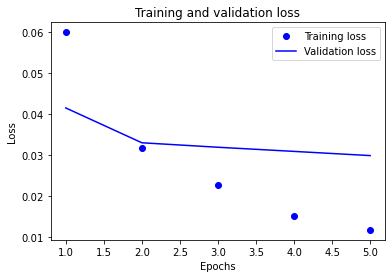

In [66]:
import matplotlib.pyplot as plt
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

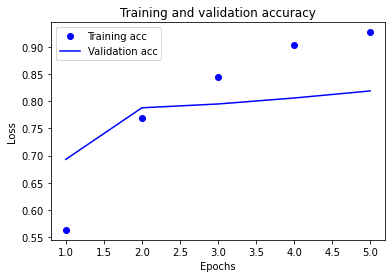

In [67]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()